In [1]:
import numpy as np
np.random.seed(0)
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sns.set_style(style='ticks')

In [3]:
ds = pd.read_csv('titanic_train.csv')
ds.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
ds.shape

(891, 12)

In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
ds.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
numerical_features = ds.select_dtypes(include = ['float64','int64']).columns.to_list()
categorical_features = ds.select_dtypes(exclude = ['float64','int64']).columns.to_list()

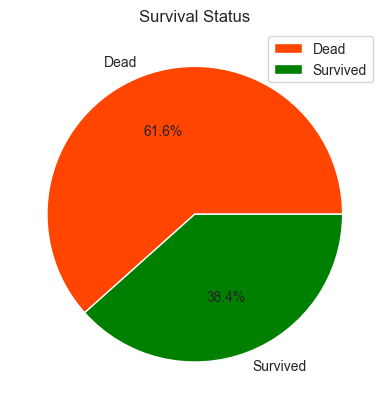

In [8]:
plt.pie(
    ds['Survived'].value_counts().sort_values(ascending=False),
    labels=['Dead', 'Survived'],
    colors=['Orangered', 'Green'],
    autopct='%1.1f%%'
)
plt.legend(['Dead', 'Survived'], loc='upper right')
plt.title('Survival Status')
plt.show()

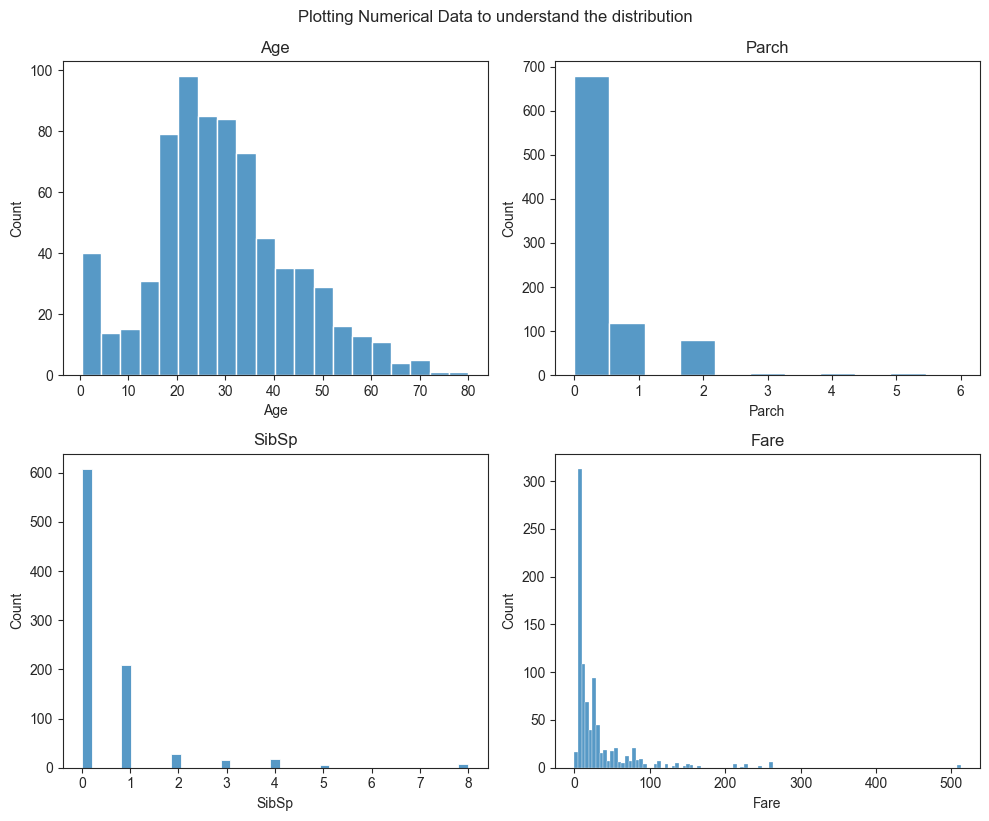

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
sns.histplot(data=ds, x='Age', ax = axes[0,0]).set_title('Age')
sns.histplot(data=ds, x='Parch', ax = axes[0,1]).set_title('Parch')
sns.histplot(data=ds, x='SibSp', ax = axes[1,0]).set_title('SibSp')
sns.histplot(data=ds, x='Fare', ax = axes[1,1]).set_title('Fare')
plt.tight_layout()
plt.suptitle('Plotting Numerical Data to understand the distribution', y=1.02)
plt.show()

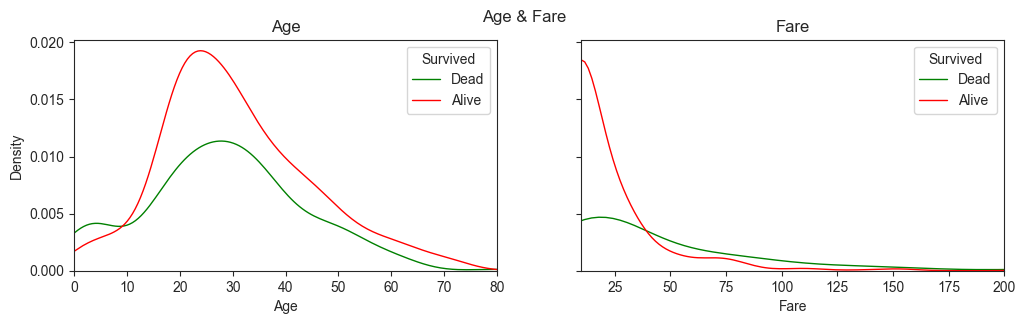

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(12, 3), sharey=True)

# Plot the kernel density estimate for age, colored by survival status
ax = sns.kdeplot(
    data=ds,
    x="Age",
    hue="Survived",
    palette=["Red", "Green"],
    legend=True,
    linewidth=1,
    ax=axes[0],
)

# Set the x-axis limits
ax.set_xlim([0, 80])

# Add a title to the first subplot
ax.set_title("Age")

# Customise the legend labels
ax.legend(["Dead", "Alive"], title="Survived")

# Plot the second subplot
ax = sns.kdeplot(
    data=ds,
    x="Fare",
    hue="Survived",
    palette=["Red", "Green"],
    legend=True,
    linewidth=1,
    ax=axes[1],
)

# Set the x-axis limits
ax.set_xlim([10, 200])

# Add a title to the second subplot
ax.set_title("Fare")

# Customise the legend labels
ax.legend(["Dead", "Alive"], title="Survived")

plt.subplots_adjust(hspace=0.6)
plt.suptitle('Age & Fare')
plt.show()

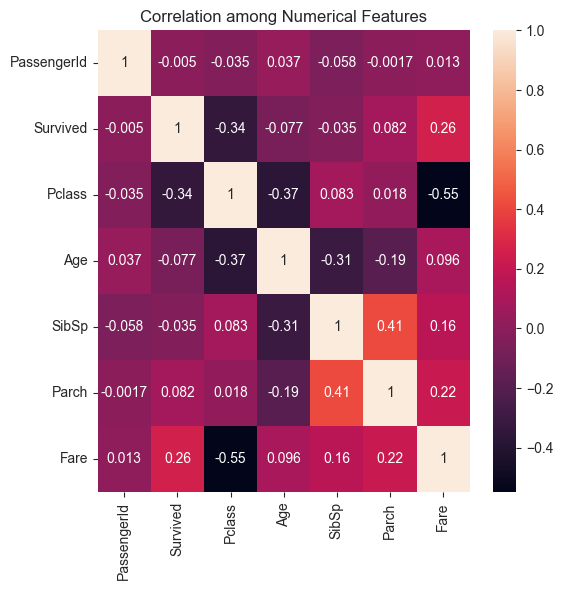

In [11]:
correlation_matrix = ds[numerical_features].corr()
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True).set_title('Correlation among Numerical Features')
plt.show()

In [12]:
pivot_table_ds = pd.pivot_table(data = ds, index = 'Survived', 
                                values = ['Age','SibSp','Parch','Fare'], 
                                aggfunc='mean').round(2) 
pivot_table_ds

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.63,22.12,0.33,0.55
1,28.34,48.40,0.46,0.47


<Figure size 1000x1000 with 0 Axes>

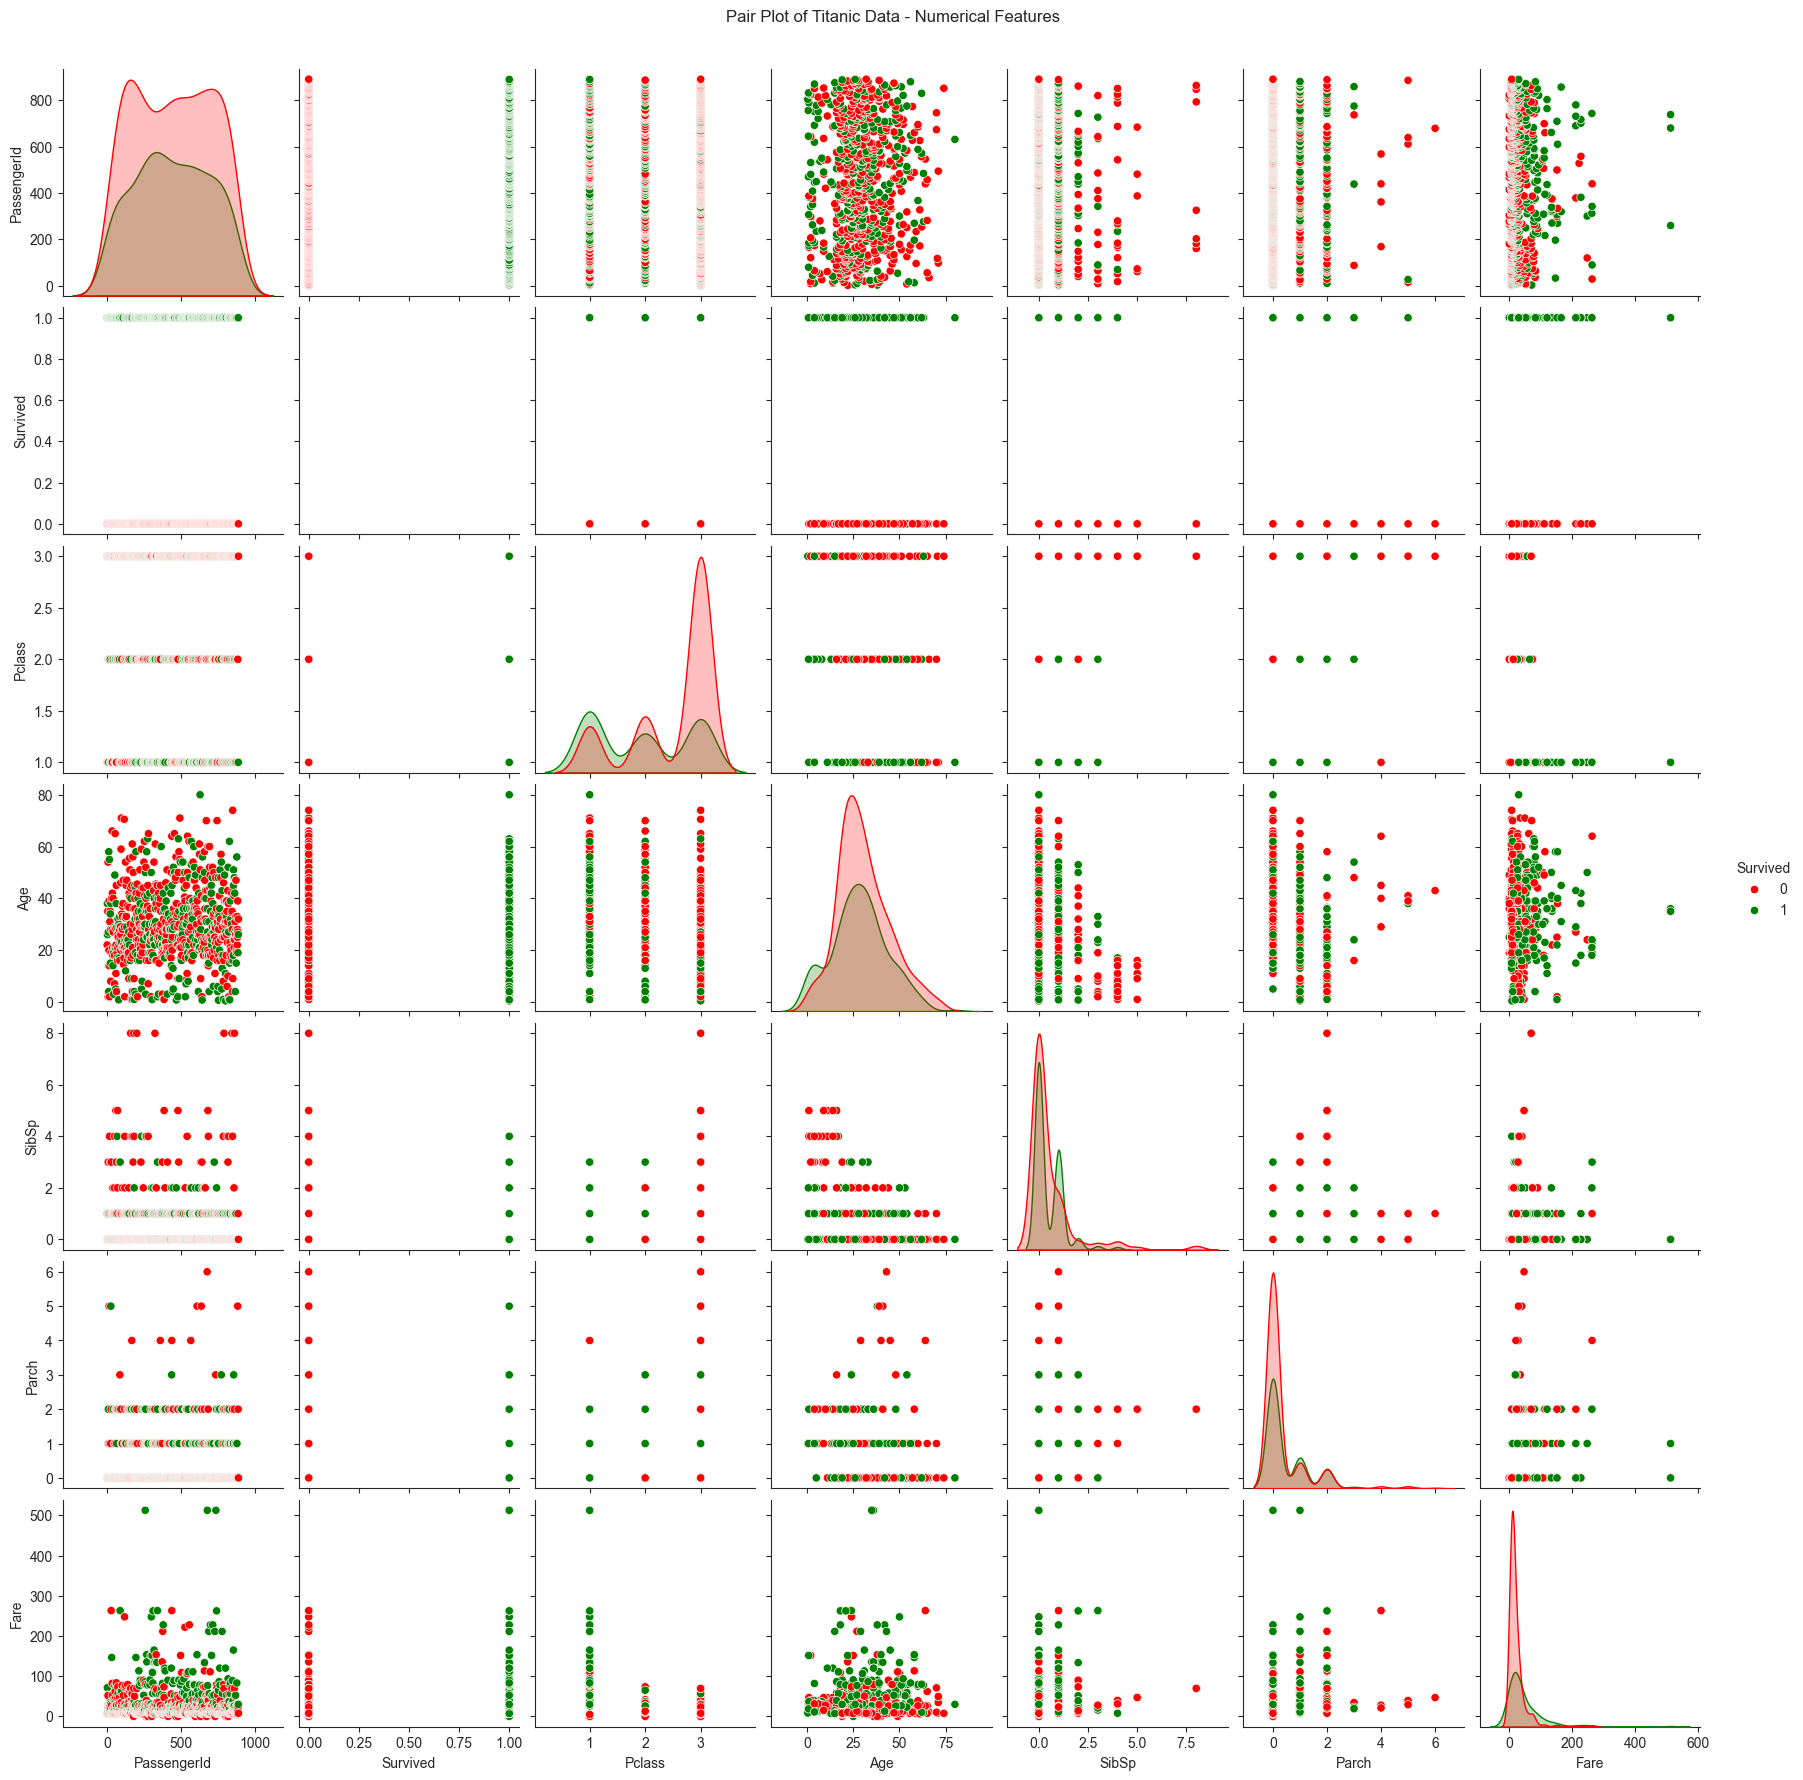

In [13]:
plt.figure(figsize=(10, 10))  
sns.pairplot(data=ds, vars=numerical_features, kind='scatter', hue='Survived',palette=['red','green'])
plt.suptitle("Pair Plot of Titanic Data - Numerical Features", y=1.02)
plt.show()

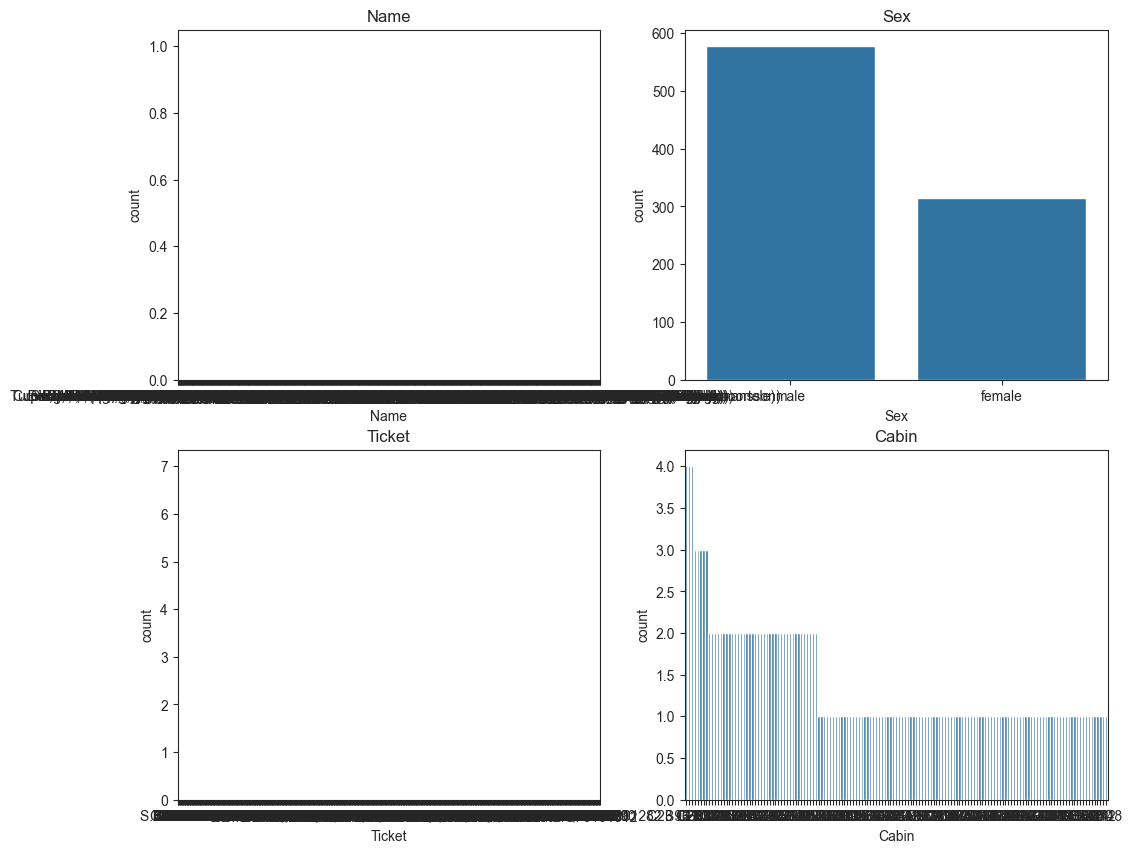

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
for i, feature in enumerate(categorical_features[:4]):
    row = i // 2
    col = i % 2
    sns.barplot(x=ds[feature].value_counts().index, y=ds[feature].value_counts(), ax=axes[row, col])
    axes[row, col].set_title(feature)

In [16]:
print(pd.pivot_table(ds, index = 'Survived', columns = 'Pclass', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(ds, index = 'Survived', columns = 'Sex', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(ds, index = 'Survived', columns = 'Embarked', values = 'Ticket' ,aggfunc ='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


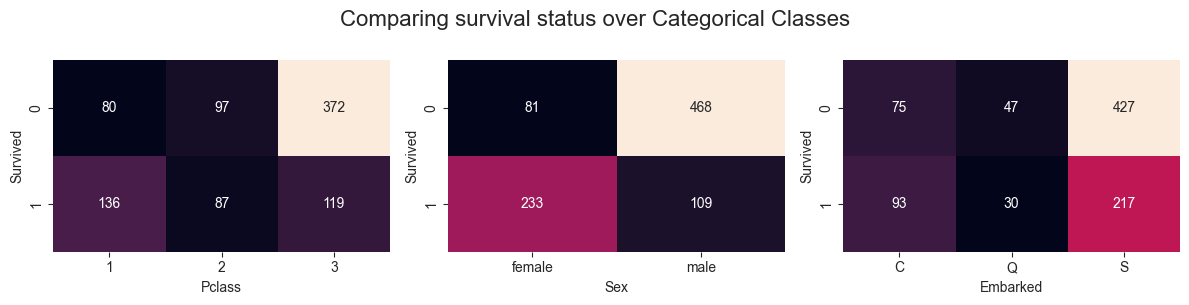

In [17]:
fig , axes = plt.subplots(1, 3, figsize=(12, 3))
plt.suptitle("Comparing survival status over Categorical Classes", y=1, fontsize=16)

sns.heatmap(pd.pivot_table(ds, index = 'Survived', columns = 'Pclass', values = 'Ticket' ,aggfunc ='count'), 
            ax = axes[0], cbar = False,
            annot=True, fmt="")
sns.heatmap(pd.pivot_table(ds, index = 'Survived', columns = 'Sex', values = 'Ticket' ,aggfunc ='count'), 
            ax = axes[1], cbar = False,
            annot=True, fmt="")
sns.heatmap(pd.pivot_table(ds, index = 'Survived', columns = 'Embarked', values = 'Ticket' ,aggfunc ='count'), 
            ax = axes[2], cbar = False,
            annot=True, fmt="")
plt.tight_layout()
plt.show()

In [18]:
ds.isna().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Name             0
Pclass           0
Survived         0
Sex              0
Parch            0
SibSp            0
Fare             0
Ticket           0
dtype: int64

<Axes: >

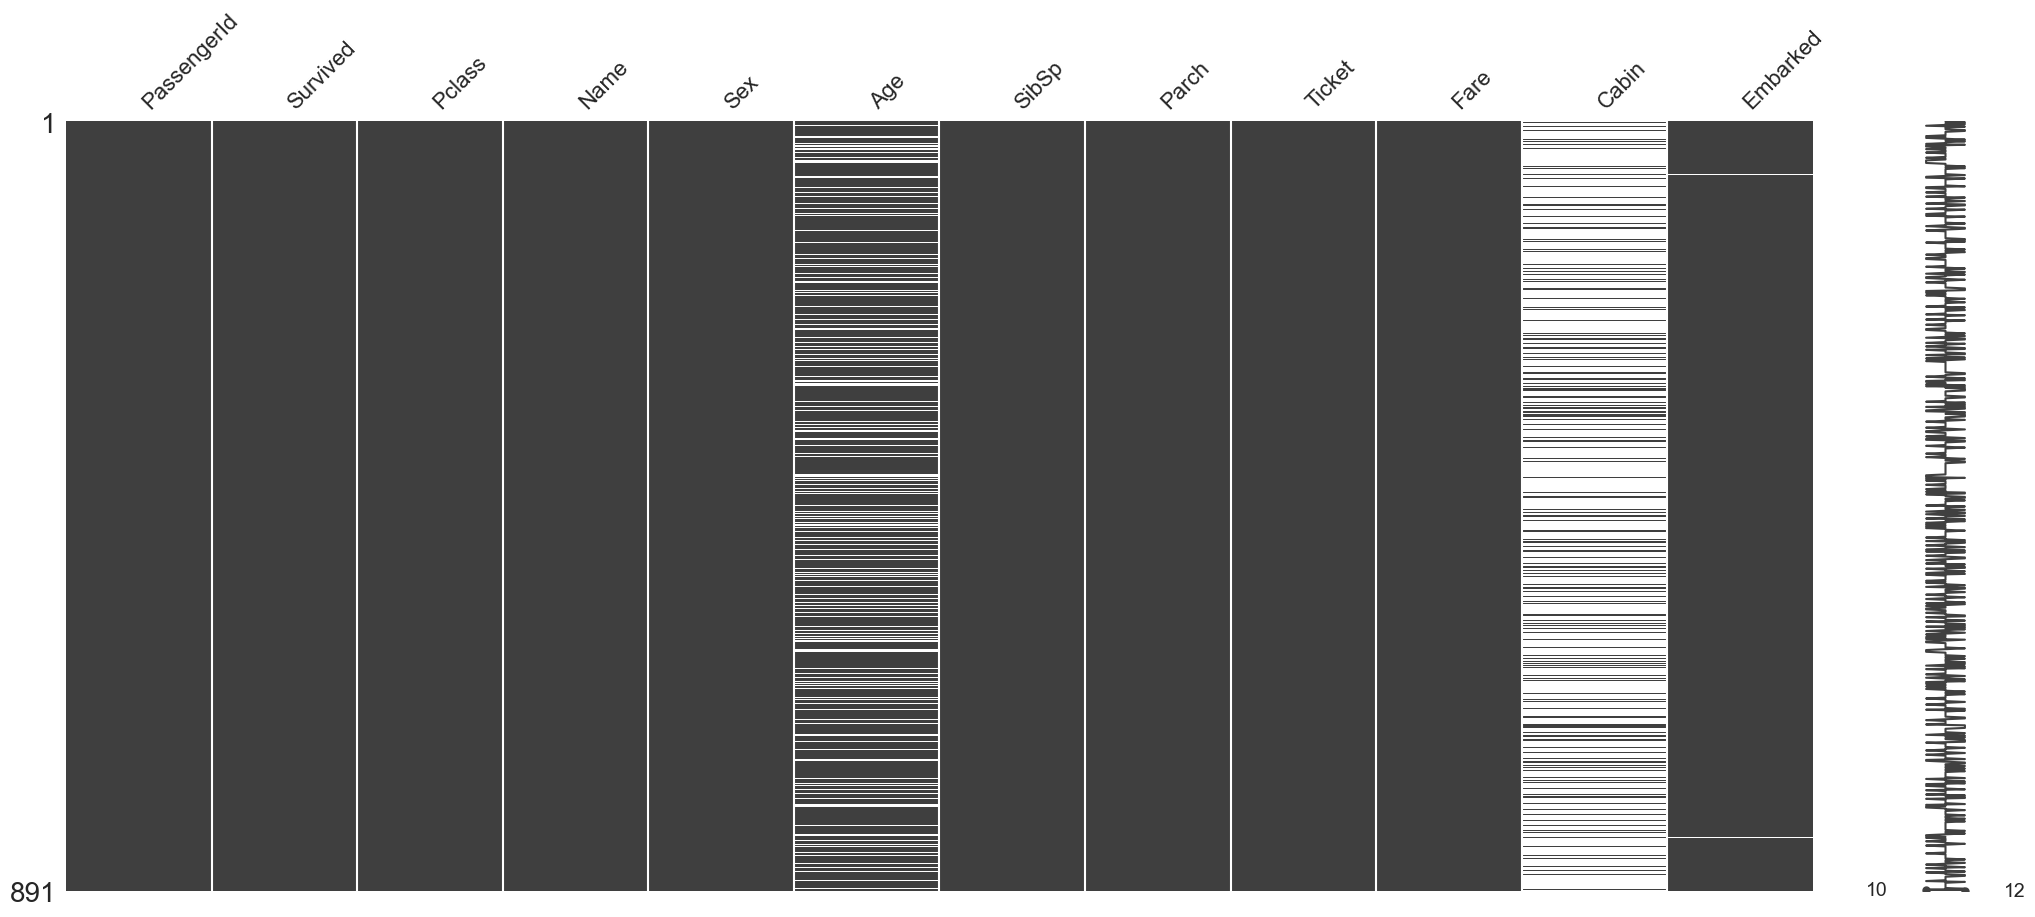

In [20]:
import missingno as msno
msno.matrix(ds)

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.preprocessing import FunctionTransformer

numerical_transformer = Pipeline( steps= [
    ("imputer", SimpleImputer(strategy='median')),
    ("scaler", RobustScaler())
])
    

categorical_transformer = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

def family_size(data):
    data['Family_Size'] = data['SibSp'] + data['Parch'] + 1
    data['Family_Size'] = data['Family_Size'].apply(lambda x: 1 if x == 1 else (2 if x <= 4 else 3))
    return data

preprocessor = ColumnTransformer(transformers=[
    ('numerical_transformer', numerical_transformer, ['Age', 'Fare']),
    ('categorical_transformer', categorical_transformer, ['Sex', 'Embarked']),
])

In [22]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

lr = LogisticRegression(random_state=42, penalty='l2', C=0.2) 

base_pipeline = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('lr', lr)
])

In [24]:
X = ds.drop(['Name','Ticket','Cabin','PassengerId', 'Survived'], axis=1)
y = ds.Survived
len(y)

891

In [25]:
%%time

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

base_pipeline.fit(X_train, y_train)
base_pipeline.score(X_test, y_test)
y_pred = base_pipeline.predict(X_test)

CPU times: total: 31.2 ms
Wall time: 105 ms


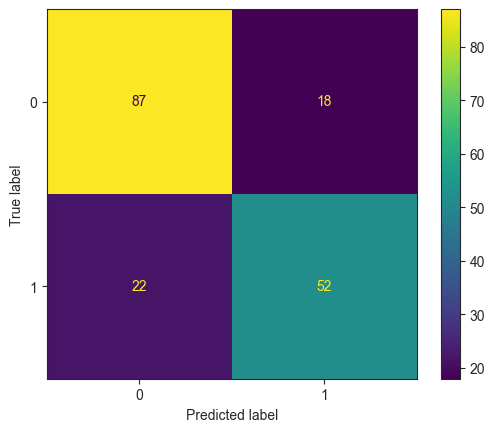

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()
plt.savefig('conf.jpg')

In [27]:
transformed_feature_names = []

numerical_feature_names = preprocessor.named_transformers_['numerical_transformer'].named_steps['scaler'].get_feature_names_out()
transformed_feature_names.extend(numerical_feature_names)

categorical_feature_names = preprocessor.named_transformers_['categorical_transformer'].get_feature_names_out(input_features=['Sex', 'Embarked'])
transformed_feature_names.extend(categorical_feature_names)

family_size_feature_names = ['Family_Size']  
transformed_feature_names.extend(family_size_feature_names)

print(transformed_feature_names)

['x0', 'x1', 'Sex_male', 'Embarked_Q', 'Embarked_S', 'Embarked_nan', 'Family_Size']


In [28]:
cv_scores = cross_val_score(base_pipeline, X_train, y_train, cv=10)
cv_scores.mean()

np.float64(0.7837050078247262)

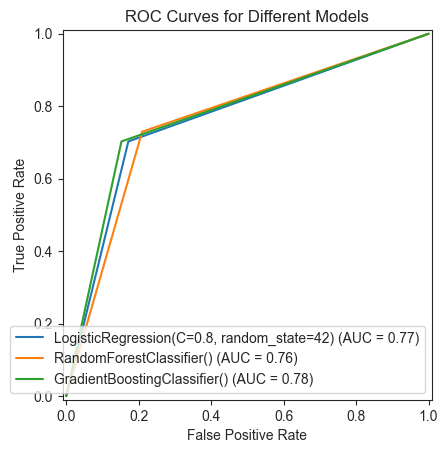

In [29]:
from sklearn.metrics import RocCurveDisplay

models = [LogisticRegression(random_state=42, penalty='l2', C=0.8),RandomForestClassifier(),GradientBoostingClassifier()]


fig, ax = plt.subplots()

for model in models:
    pipeline = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('model',model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                            estimator_name=model)
    display.plot(ax=ax)
    plt.savefig('ROC.jpg')

ax.set_title("ROC Curves for Different Models")
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")

plt.show()


In [30]:
base_pipeline.fit(X,y)
test = pd.read_csv('titanic_train.csv')
predictions = base_pipeline.predict(test)
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('submission1.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
